In [ ]:
# Linear Model

https://scikit-learn.org/stable/modules/linear_model.html

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. 

In mathematical notation, if $\hat{y}$ is the predicted value.

$$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p $$

Across the module, we designate the vector $w = (w_1,..., w_p)$ as coef_ and $w_0$ as intercept_.

To perform classification with generalized linear models, i.e., Logistic regression.

In [ ]:
#  Ordinary Least Squares

https://scikit-learn.org/stable/modules/linear_model.html
    
LinearRegression fits a linear model with coefficients $ w = (w_{1}, w_{2}, ..., w_{p})$ 
to minimize the residual sum of squares between the observed targets in the dataset, and $w$the targets predicted by the linear approximation. Mathematically it solves a problem of the form:

$$ \min_w || X_{w} - y ||^{2}_{2} $$

![image-3.png](attachment:image-3.png)

LinearRegression will take in its fit method arrays $X, y$ and will store the coefficients $w$ of the linear model in its coef_ member:

## Example: Linear Regression 

In [2]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
print('reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2]):')
print(reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2]))
print()
#LinearRegression()
print('reg.coef_:')
print(reg.coef_)
#array([0.5, 0.5])

reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2]):
LinearRegression()

reg.coef_:
[0.5 0.5]


# Linear Regression Example:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


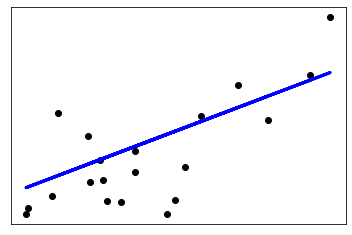

In [3]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Ordinary Least Squares Complexity

https://scikit-learn.org/stable/modules/linear_model.html
    
The least squares solution is computed using the singular value decomposition of $X$. 

If X is a matrix of shape (n_samples, n_features) this method has a cost of $O(n_{samples}n^{2}_{features}$)
, assuming that $n_{samples} \geq n_{features}$.

# Ridge Regression and Classification

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. 

The ridge coefficients minimize a penalized residual sum of squares:
    
$$ \min_w || X_{w} - y ||^{2}_{2} + \alpha ||w||^{2}_{2} $$ 

The complexity parameter $\alpha \geq 0 $ controls the amount of shrinkage: 
    
the larger the value of $\alpha $, the greater the amount of shrinkage and thus the coefficients have more effect to collinearity.

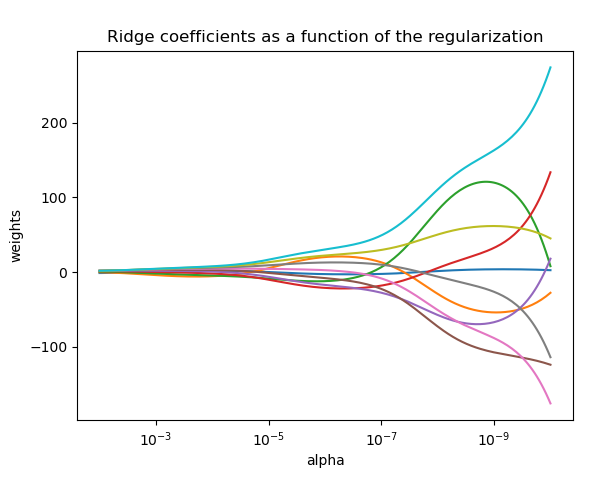

With other linear models, Ridge will take in its fit method arrays $X, y$ and store the coefficients $w$ of the linear model in its coef_ member:
    
## Example: Ridge Regression 

In [7]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
print('reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]):')
print(reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]))
print()
#Ridge(alpha=0.5)
print('reg.coef_:')
print(reg.coef_)
print()
#array([0.34545455, 0.34545455])
print('reg.intercept_:')
print(reg.intercept_)
#0.13636...

reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]):
Ridge(alpha=0.5)

reg.coef_:
[0.34545455 0.34545455]

reg.intercept_:
0.1363636363636364


# Classification

The Ridge regressor has a classifier variant: RidgeClassifier. 
    
This classifier first converts binary targets to {-1, 1} and then treats the problem as a regression task, optimizing the same objective as above. 

The predicted class corresponds to the sign of the regressor’s prediction. 

For multiclass classification, the problem is treated as multi-output regression, and the predicted class corresponds to the output with the highest value.

It might seem questionable to use a (penalized) Least Squares loss to fit a classification model instead of the more traditional logistic or hinge losses. 

However in practice all those models can lead to similar cross-validation scores in terms of accuracy or precision/recall, while the penalized least squares loss used by the RidgeClassifier allows for a very different choice of the numerical solvers with distinct computational performance profiles.

The RidgeClassifier can be significantly faster than, e.g., LogisticRegression with a high number of classes, because it is able to compute the projection matrix $(X^{T}X)^{-1}X^{T}$ only once.

This classifier is sometimes referred to as a Least Squares Support Vector Machines with a linear kernel.

# Example: Plot Ridge Regression

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py

Automatically created module for IPython interactive environment


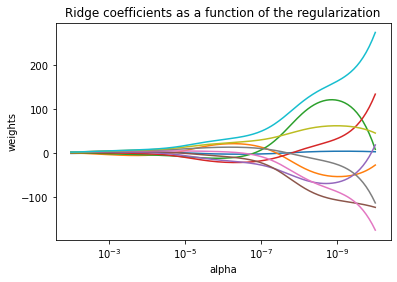

In [9]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Example: Interpretation of coefficients of linear models

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py
    
In linear models, the target value is modeled as a linear combination of the features.

This is different from plotting $X_i$ versus $y$ and fitting a linear relationship: in that case all possible values of the other features are taken into account in the estimation (marginal dependence).

This example will provide some hints in interpreting coefficient in linear models, pointing at problems that arise when either the linear model is not appropriate to describe the dataset, or when features are correlated.

We will use data from the “Current Population Survey” from 1985 to predict wage as a function of various features such as experience, age, or education.

Automatically created module for IPython interactive environment
X.head():
   EDUCATION SOUTH     SEX  EXPERIENCE       UNION   AGE      RACE OCCUPATION  \
0        8.0    no  female        21.0  not_member  35.0  Hispanic      Other   
1        9.0    no  female        42.0  not_member  57.0     White      Other   
2       12.0    no    male         1.0  not_member  19.0     White      Other   
3       12.0    no    male         4.0  not_member  22.0     White      Other   
4       12.0    no    male        17.0  not_member  35.0     White      Other   

          SECTOR       MARR  
0  Manufacturing    Married  
1  Manufacturing    Married  
2  Manufacturing  Unmarried  
3          Other  Unmarried  
4          Other    Married  

survey.target.head():
0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64



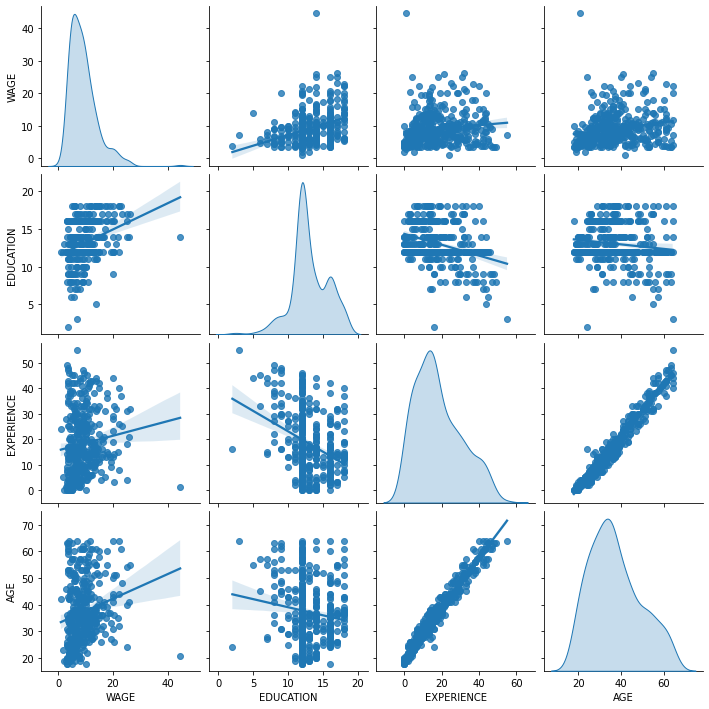

In [19]:
print(__doc__)

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)

X = survey.data[survey.feature_names]
#print('X.describe(include="all"):')
#print(X.describe(include="all"))
#print()
print('X.head():')
print(X.head())
print()

y = survey.target.values.ravel()
print('survey.target.head():')
print(survey.target.head())
print()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

train_dataset = X_train.copy()
train_dataset.insert(0, "WAGE", y_train)
_ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

# Ridge Complexity

This method has the same order of complexity as Ordinary Least Squares.

# Generalized Cross-Validation 

https://scikit-learn.org/stable/modules/linear_model.html
    
Setting the regularization parameter: generalized Cross-Validation

RidgeCV implements ridge regression with built-in cross-validation of the alpha parameter. 

The object works in the same way as GridSearchCV except that it defaults to Generalized Cross-Validation (GCV), an efficient form of leave-one-out cross-validation:

## Example: Generalized Cross-Validation

In [33]:
import numpy as np
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
print ('reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13)):')
print()
print('reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]):')
print(reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]))
print()
# RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
#      1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))
print('reg.alpha_:')
print(reg.alpha_)
# 0.01

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13)):

reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]):
RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

reg.alpha_:
0.01


## Note:

Specifying the value of the cv attribute will trigger the use of cross-validation with GridSearchCV, for example, cv=10 for 10-fold cross-validation, rather than Generalized Cross-Validation.

# Lasso (Least Absolute Shrinkage and Selection Operator)

The Lasso is a linear model that estimates sparse coefficients. 

It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. 

For this reason Lasso and its variants are fundamental to the field of compressed sensing. 

Under certain conditions, it can recover the exact set of non-zero coefficients.

Mathematically, it consists of a linear model with an added regularization term. 

The objective function to minimize is:

$$ \min_{w} \frac {1} {2n_{samples}} || X_{w} - y ||^{2}_{2} + \alpha || w ||_{1} $$

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha || w ||_{1} $
added, where $\alpha$ is a constant and $|| w ||_{1} $ is the $l_{1}$-norm of the coefficient vector. 

## Note:

The coefficient factor 1/2 is a constant and has no significance. 

This coefficient is used for cancellation for quadratic derivative only.

# Example: LASSO Regression

In [35]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
print('reg.fit([[0, 0], [1, 1]], [0, 1]):')
print(reg.fit([[0, 0], [1, 1]], [0, 1]))
print()
#Lasso(alpha=0.1)
print('reg.predict([[1, 1]]):')
print(reg.predict([[1, 1]]))
#array([0.8])

reg.fit([[0, 0], [1, 1]], [0, 1]):
Lasso(alpha=0.1)

reg.predict([[1, 1]]):
[0.8]


# Example: Lasso and Elastic Net for Sparse Signals
https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py

Automatically created module for IPython interactive environment
Lasso(alpha=0.1)
r^2 on test data : 0.658064
ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.642515


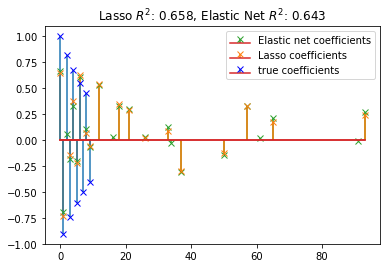

In [36]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

# #############################################################################
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)

# Add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

# #############################################################################
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

# #############################################################################
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                   markerfmt='x', label='Elastic net coefficients',
                   use_line_collection=True)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients',
                   use_line_collection=True)
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx', use_line_collection=True)

plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

# Setting regularization parameter

https://scikit-learn.org/stable/modules/linear_model.html
    
The alpha parameter controls the degree of sparsity of the estimated coefficients.

# Using cross-validation

scikit-learn exposes objects that set the Lasso alpha parameter by cross-validation: LassoCV and LassoLarsCV. 
    
LassoLarsCV is based on the Least Angle Regression algorithm explained below.

For high-dimensional datasets with many collinear features, LassoCV is most often preferable. 

However, LassoLarsCV has the advantage of exploring more relevant values of alpha parameter, and if the number of samples is very small compared to the number of features, it is often faster than LassoCV.

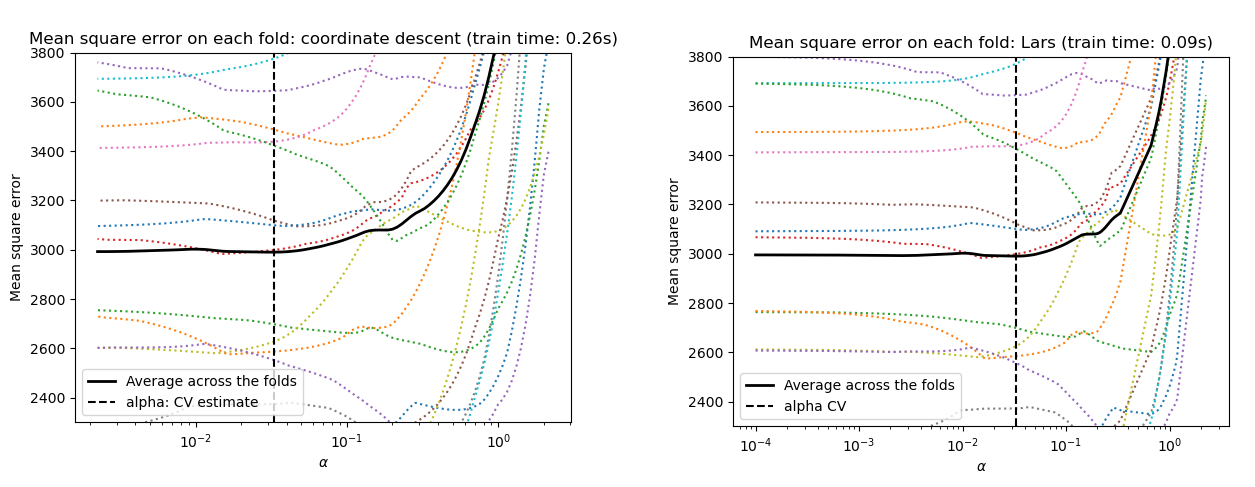

# Information-criteria based model selection

Alternatively, the estimator LassoLarsIC proposes to use the Akaike information criterion (AIC) and the Bayes Information criterion (BIC). 

It is a computationally cheaper alternative to find the optimal value of alpha as the regularization path is computed only once instead of k+1 times when using k-fold cross-validation. 

However, such criteria needs a proper estimation of the degrees of freedom of the solution, are derived for large samples (asymptotic results) and assume the model is correct, i.e., that the data are actually generated by this model. 

They also tend to break when the problem is badly conditioned (more features than samples).

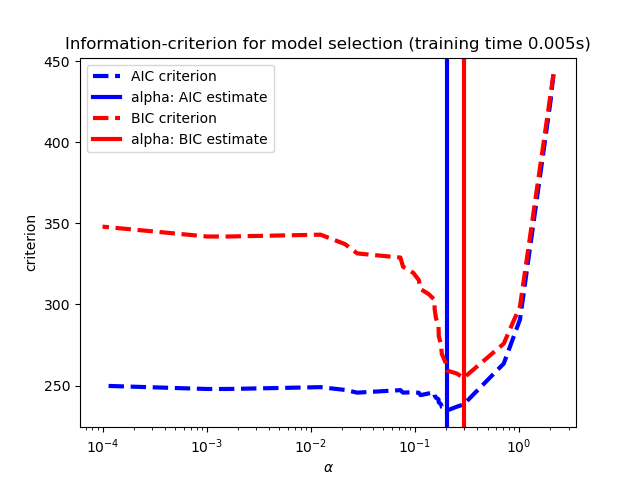

# Example: Lasso model selection: Cross-Validation / AIC / BIC

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py


Use the Akaike information criterion (AIC), the Bayes Information criterion (BIC) and cross-validation to select an optimal value of the regularization parameter alpha of the Lasso estimator.

Results obtained with LassoLarsIC are based on AIC/BIC criteria.

Information-criterion based model selection is very fast, but it relies on a proper estimation of degrees of freedom, are derived for large samples (asymptotic results) and assume the model is correct, i.e. that the data are actually generated by this model. They also tend to break when the problem is badly conditioned (more features than samples).

For cross-validation, we use 20-fold with 2 algorithms to compute the Lasso path: coordinate descent, as implemented by the LassoCV class, and Lars (least angle regression) as implemented by the LassoLarsCV class. Both algorithms give roughly the same results. They differ with regards to their execution speed and sources of numerical errors.

Lars computes a path solution only for each kink in the path. As a result, it is very efficient when there are only of few kinks, which is the case if there are few features or samples. Also, it is able to compute the full path without setting any meta parameter. On the opposite, coordinate descent compute the path points on a pre-specified grid (here we use the default). Thus it is more efficient if the number of grid points is smaller than the number of kinks in the path. Such a strategy can be interesting if the number of features is really large and there are enough samples to select a large amount. In terms of numerical errors, for heavily correlated variables, Lars will accumulate more errors, while the coordinate descent algorithm will only sample the path on a grid.

Note how the optimal value of alpha varies for each fold. 

This illustrates why nested-cross validation is necessary when trying to evaluate the performance of a method for which a parameter is chosen by cross-validation: this choice of parameter may not be optimal for unseen data.

Automatically created module for IPython interactive environment
Compute regularization path using the BIC/AIC...
Display regularization path using the BIC/AIC...


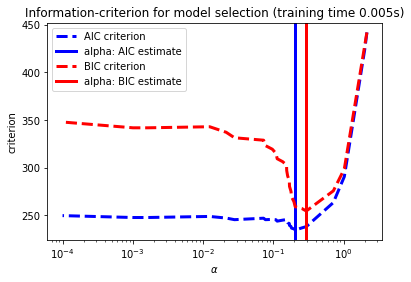

Computing regularization path using the coordinate descent lasso...
Display regularization path using the coordinate descent lasso...


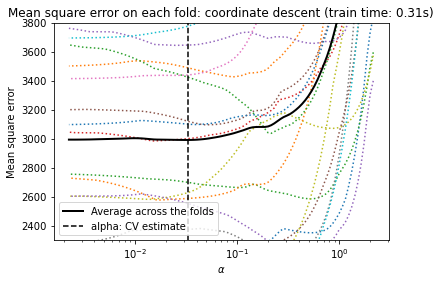

Computing regularization path using the Lars lasso...
Display regularization path using the Lars lasso...


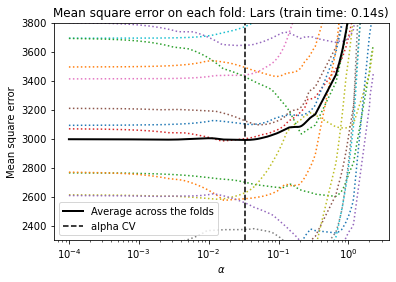

In [41]:
print(__doc__)

# Author: Olivier Grisel, Gael Varoquaux, Alexandre Gramfort
# License: BSD 3 clause

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

X, y = datasets.load_diabetes(return_X_y=True)

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion
print("Compute regularization path using the BIC/AIC...")
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(model.alphas_ + EPSILON, criterion_, '--', color=color,
                 linewidth=3, label='%s criterion' % name)
    plt.axvline(model.alpha_ + EPSILON, color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel(r'$\alpha$')
    plt.ylabel('criterion')


plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)
print("Display regularization path using the BIC/AIC...")
plt.show()
# #############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results

plt.figure()
ymin, ymax = 2300, 3800
plt.semilogx(model.alphas_ + EPSILON, model.mse_path_, ':')
plt.plot(model.alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_ + EPSILON, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
print("Display regularization path using the coordinate descent lasso...")
plt.show()
# #############################################################################
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

# Display results

plt.figure()
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_, linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
print("Display regularization path using the Lars lasso...")
plt.show()

# Multi-task Lasso

https://scikit-learn.org/stable/modules/linear_model.html#multi-task-lasso

The MultiTaskLasso is a linear model that estimates sparse coefficients for multiple regression problems jointly: y is a 2D array, of shape (n_samples, n_tasks). 
    
The constraint is that the selected features are the same for all the regression problems, also called tasks.

The following figure compares the location of the non-zero entries in the coefficient matrix W obtained with a simple Lasso or a MultiTaskLasso. The Lasso estimates yield scattered non-zeros while the non-zeros of the MultiTaskLasso are full columns.

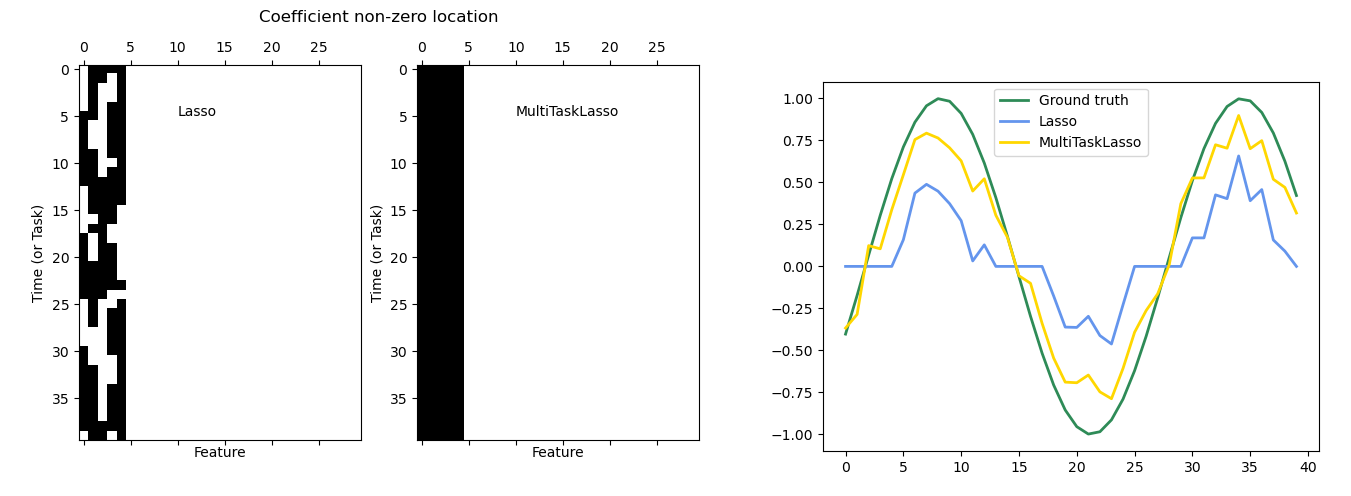

Fitting a time-series model, imposing that any active feature be active at all times.


Mathematically, it consists of a linear model trained with a mixed $l_{1}, l_{2}$-norm for regularization. 

The objective function to minimize is:

$$ \min_{w} \frac {1} {2n_{samples}} || XW - Y ||^{2}_{Fro} + \alpha || W ||_{21} $$

where $Fro$ indicates the Frobenius norm:
    
$$ ||A||_{Fro} = \sqrt {\sum_{ij} \alpha^{2}_{ij}} $$

and $l_{1}, l_{2}$ reads:
    
$$ ||A||_{21} = \sum_{i} \sqrt {\sum_{j} \alpha^{2}_{ij}} $$

The implementation in the class MultiTaskLasso uses coordinate descent as the algorithm to fit the coefficients.

# Example: Multi-Task Lasso

Joint feature selection with multi-task Lasso

https://scikit-learn.org/stable/auto_examples/linear_model/plot_multi_task_lasso_support.html#sphx-glr-auto-examples-linear-model-plot-multi-task-lasso-support-py

Automatically created module for IPython interactive environment
Lasso and MultiTaskLasso:


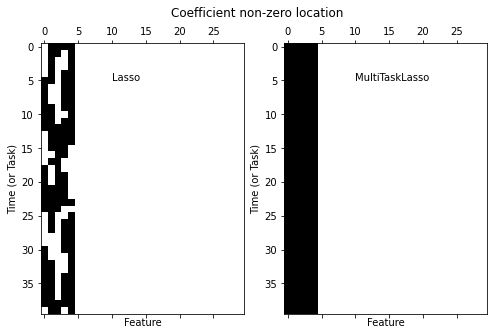

Plot, Ground Truth, Lasso, and MultiTaskLasso:


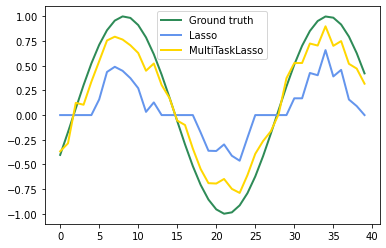

In [46]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

# #############################################################################
# Plot support and time series
print ('Lasso and MultiTaskLasso:')
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')
plt.show()

print ('Plot, Ground Truth, Lasso, and MultiTaskLasso:')
feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()

# Elastic-Net

ElasticNet is a linear regression model trained with both $l_{1}$ and $l_{2}$-norm regularization of the coefficients.

This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

We control the convex combination of $l_{1}$ and $l_{2}$ using the l1_ratio parameter.

Elastic-net is useful when there are multiple features which are correlated with one another. 

Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case

$$ \min_{w} \frac {1} {2n_{samples}} || X_{w} - y ||^{2}_{2} +\alpha \rho || w ||_{1} + \frac {\alpha (1-\rho)} {2} ||w ||^{2}_{2} $$

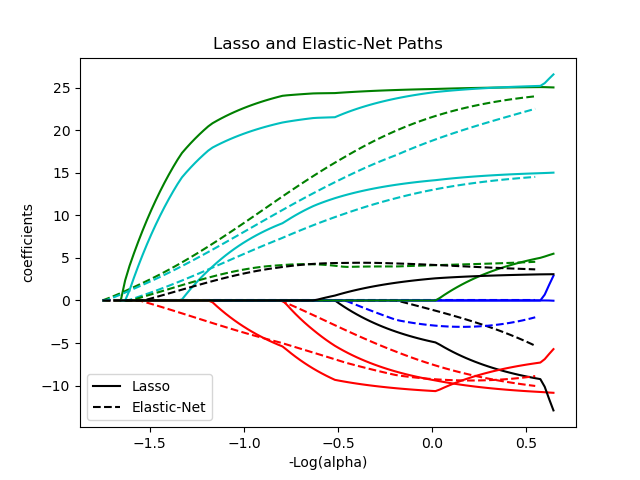



The class ElasticNetCV can be used to set the parameters alpha () and l1_ratio () by cross-validation.

# Lasso and Elastic Net

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

Automatically created module for IPython interactive environment
Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


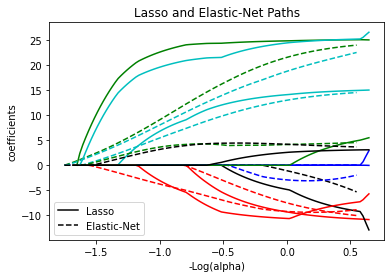

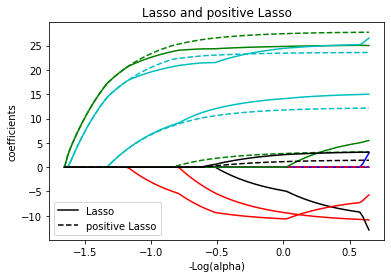

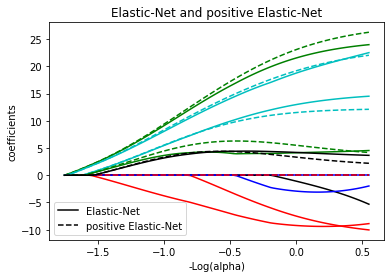

In [47]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets


X, y = datasets.load_diabetes(return_X_y=True)


X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps, fit_intercept=False)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

# Multi-task Elastic-Net

The MultiTaskElasticNet is an elastic-net model that estimates sparse coefficients for multiple regression problems jointly: 
    
Y is a 2D array of shape (n_samples, n_tasks). 

The constraint is that the selected features are the same for all the regression problems, also called tasks.

Mathematically, it consists of a linear model trained with a mixed $l_{1}$ and $l_{2}$-norm and 
$l_{2}$-norm  for regularization. The objective function to minimize is:

$$ \min_{w} \frac {1} {2n_{samples}} || X_{w} - y ||^{2}_{Fro} +\alpha \rho || w ||_{21} + \frac {\alpha (1-\rho)} {2} ||w ||^{2}_{Fro} $$ 
 
 
The implementation in the class MultiTaskElasticNet uses coordinate descent as the algorithm to fit the coefficients.

The class MultiTaskElasticNetCV can be used to set the parameters alpha ($\alpha$) and l1_ratio ($\rho$) by cross-validation.

# Least Angle Regression

LARS (Least-Angle Regression) is a regression algorithm for high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. 

LARS is similar to forward stepwise regression.

At each step, it finds the feature most correlated with the target.

When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

The advantages of LARS are:

- It is numerically efficient in contexts where the number of features is significantly greater than the number of samples.
- It is computationally just as fast as forward selection and has the same order of complexity as ordinary least squares.
- It produces a full piecewise linear solution path, which is useful in cross-validation or similar attempts to tune the model.
- If two features are almost equally correlated with the target, then their coefficients should increase at approximately the same rate. The algorithm thus behaves as intuition would expect, and also is more stable.
- It is easily modified to produce solutions for other estimators, like the Lasso.

The disadvantages of the LARS method include:

- Because LARS is based upon an iterative refitting of the residuals, it would appear to be especially sensitive to the effects of noise. This problem is discussed in detail by Weisberg in the discussion section of the Efron et al. (2004) Annals of Statistics article.

The LARS model can be used using estimator Lars, or its low-level implementation lars_path or lars_path_gram.

# LARS Lasso

https://scikit-learn.org/stable/modules/linear_model.html#elastic-net

LassoLars is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients.

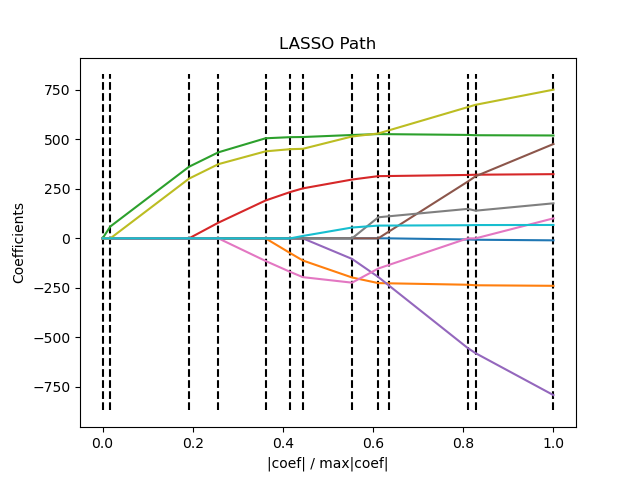

In [48]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)
print('reg.fit([[0, 0], [1, 1]], [0, 1]):')
print(reg.fit([[0, 0], [1, 1]], [0, 1]))
print()
# LassoLars(alpha=0.1)
print('reg.coef_:')
print(reg.coef_)
#array([0.717157..., 0.        ])

reg.fit([[0, 0], [1, 1]], [0, 1]):
LassoLars(alpha=0.1)

reg.coef_:
[0.71715729 0.        ]


# Lasso path using LARS

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-py

Computes Lasso Path along the regularization parameter using the LARS algorithm on the diabetes dataset.

Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter.

The Lars algorithm provides the full path of the coefficients along the regularization parameter almost for free, thus a common operation is to retrieve the path with one of the functions lars_path or lars_path_gram.

Automatically created module for IPython interactive environment
Computing regularization path using the LARS ...
.xx:
[   0.           60.11926965  663.66995526  888.91024335 1250.6953637
 1440.79804251 1537.06598321 1914.57052862 2115.73774356 2195.55885543
 2802.37509283 2863.01080401 3460.00495515]

xx[-1]:
3460.0049551457037



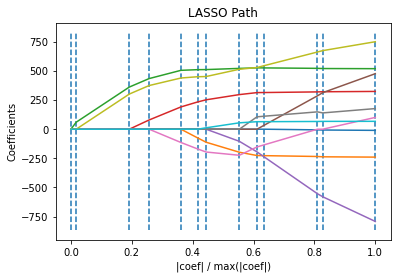

In [53]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
print('xx:')
print(xx)
print()
print('xx[-1]:')
print(xx[-1])
print()
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max(|coef|)')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

# Bayesian Regression

Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.

This can be done by introducing uninformative priors over the hyper parameters of the model. 

The $l_{2}$ regularization used in Ridge regression and classification is equivalent to finding a maximum a posteriori estimation under a Gaussian prior over the coefficients $ w $ with precision $ \lambda^{-1} $. Instead of setting lambda manually, it is possible to treat it as a random variable to be estimated from the data.

To obtain a fully probabilistic model, the output  is assumed to be Gaussian distributed around $X_{w}$:
    
$$ p(y|X_{w,\alpha} = N (y|X_{w,\alpha}) $$

where $\alpha $ is again treated as a random variable that is to be estimated from the data. 
p in continue probability and N is discrete probability.

The advantages of Bayesian Regression are:

- It adapts to the data at hand.
- It can be used to include regularization parameters in the estimation procedure.

The disadvantages of Bayesian regression include:
- Inference of the model can be time consuming.

# Bayesian Ridge Regression

BayesianRidge estimates a probabilistic model of the regression problem as described above. The prior for the coefficient $w$ is given by a spherical Gaussian:

The priors over $ \alpha $ and $ \lambda $ are chosen to be gamma distributions, the conjugate prior for the precision of the Gaussian. 

The resulting model is called Bayesian Ridge Regression, and is similar to the classical Ridge.

There are four more hyperparameters, $\alpha_{1}$, $\alpha_{2}$, $ \lambda_{1}$, and $ \lambda_{2} $
 of the gamma prior distributions over  $\alpha$ and $ \lambda$. 

These are usually chosen to be non-informative. 

By default $\alpha_{1}$ = $\alpha_{2}$ = $\lambda_{1}$ = $\lambda_{2}$ = $10 ^{-6}$.

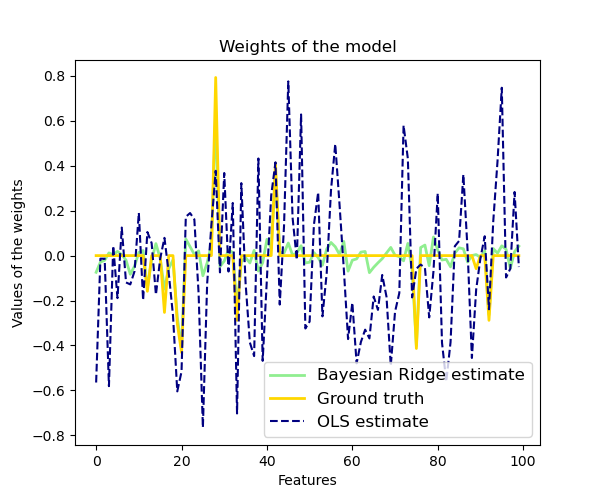

## Bayesian Ridge Regression is used for regression:
https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression

In [55]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
print('reg.fit(X, Y):')
print(reg.fit(X, Y))
print()
#BayesianRidge()
print('reg.predict([[1, 0.]]):')
print(reg.predict([[1, 0.]]))
print()
#array([0.50000013])
print('reg.coef_:')
print(reg.coef_)
#array([0.49999993, 0.49999993])

reg.fit(X, Y):
BayesianRidge()

reg.predict([[1, 0.]]):
[0.50000013]

reg.coef_:
[0.49999993 0.49999993]


# Example of Bayesian Ridge Regression

https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html

Computes a Bayesian Ridge Regression on a synthetic dataset.

See Bayesian Ridge Regression for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the coefficient weights are slightly shifted toward zeros, which stabilises them.

As the prior on the weights is a Gaussian prior, the histogram of the estimated weights is Gaussian.

The estimation of the model is done by iteratively maximizing the marginal log-likelihood of the observations.

We also plot predictions and uncertainties for Bayesian Ridge Regression for one dimensional regression using polynomial feature expansion. Note the uncertainty starts going up on the right side of the plot. This is because these test samples are outside of the range of the training samples.

Automatically created module for IPython interactive environment


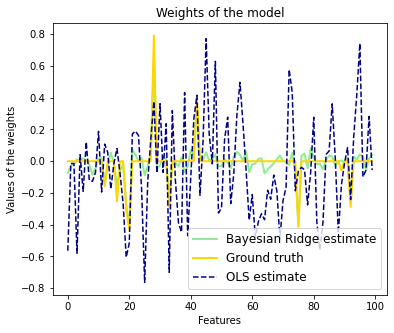

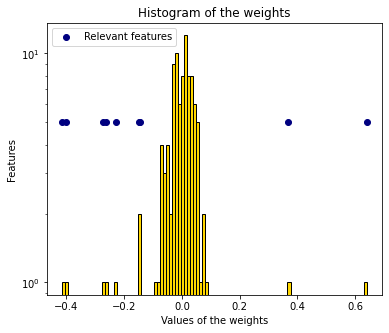

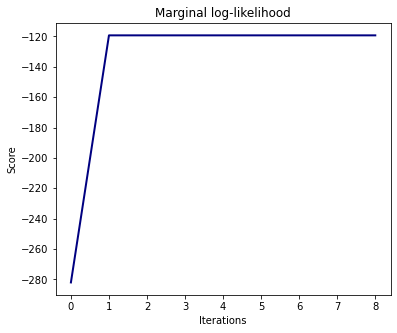

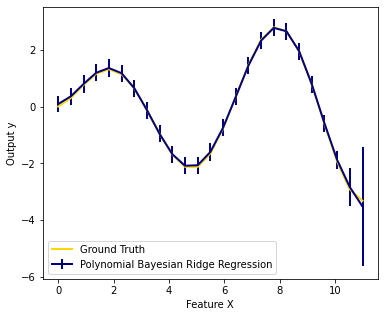

In [54]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()